In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [3]:
images_train = pd.read_csv('../isi/sign_mnist_train.csv')
images_test = pd.read_csv('../isi/sign_mnist_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../isi/sign_mnist_train.csv'

In [ ]:
image_train = images_train.iloc[0:27455, 1:785].values
label_train = images_train.iloc[0:27455, 0].values

In [4]:
image_test = images_test.iloc[0:7172, 1:785].values
label_test = images_test.iloc[0:7172,0].values

In [11]:
feature, hog_img = hog(image_train[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(4,4), visualize=True, block_norm='L2-Hys')

In [12]:
feature.shape

(0,)

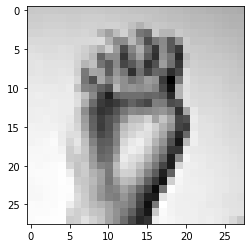

In [13]:
plt.imshow(image_train[60].reshape(28,28), cmap='gray')

In [14]:
label_train[60]

4

<BarContainer object of 0 artists>

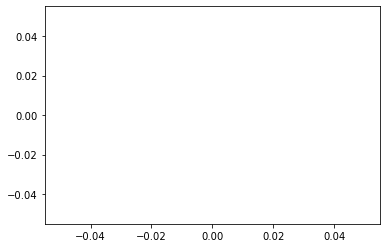

In [15]:
plt.bar(list(range(feature.shape[0])), feature)

In [16]:
n_dims = feature.shape[0]

In [17]:
n_dims

0

In [18]:
n_samples = image_train.shape[0]

In [19]:
n_samples

27455

In [20]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [21]:
for i in range(n_samples):
    X_train[i], _ = hog(image_train[i].reshape(28,28), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    y_train[i] = label_train[i]

NameError: name 'X_train' is not defined

In [22]:
classifier = GaussianNB()

In [23]:
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [24]:
n_samples = image_test.shape[0]

In [25]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [26]:
for i in range(n_samples):
    X_test[i], _ = hog(image_test[i].reshape(28,28), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    y_test[i] = label_test[i]

NameError: name 'X_test' is not defined

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
out_one_hot = classifier.predict(X_test[14].reshape(1, n_dims))

In [99]:
out_one_hot

array([7])

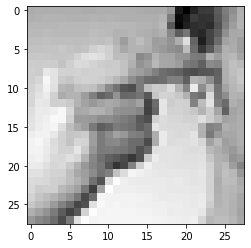

In [100]:
plt.imshow(image_test[14].reshape(28,28), cmap='gray')

In [101]:
cm = confusion_matrix(label_test,y_pred)

In [102]:
cm

array([[264,   0,   0,   0,   1,   0,   0,   0,  38,   0,   0,   0,  28,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 295,   0,   0,   0,   0,   0,   0,  17,  54,   0,   0,   0,
          0,   0,   0,  20,   0,   0,  42,   4,   0,   0,   0],
       [  0,   0, 190,   0,   0,  17,   0,   0,   4,   0,   0,   0,   0,
         82,   0,   0,   0,   0,   5,   0,   0,   0,  12,   0],
       [  0,   0,   0, 140,   0,   2,   0,   0,   0,   9,   0,   1,  18,
          0,   0,   0,  64,   0,   0,  11,   0,   0,   0,   0],
       [  5,   0,   0,   0, 430,   0,   0,   0,   0,   0,   0,  43,   3,
          0,   0,   0,   0,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   3,  20,   0,   0,   0,   0,
          0,   0,  17,   0,   0,   0,   0,   2,   0,  23,   0],
       [  0,   0,   0,   0,   0,   0, 283,  12,   0,   0,   0,   0,   0,
          0,  12,   0,   0,   0,  28,   0,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,   0,  69

In [103]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


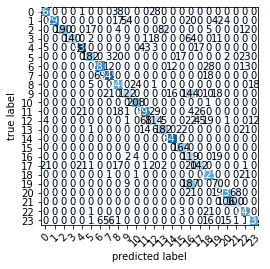

In [104]:
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names = class_names)

In [105]:
from sklearn.metrics import precision_score

In [106]:
precision = precision_score(y_test, y_pred, average=None)

In [107]:
precision

array([0.89795918, 1.        , 1.        , 1.        , 0.90909091,
       0.86666667, 0.79050279, 0.78959276, 0.67605634, 0.61616162,
       0.87763713, 0.69905213, 0.52054795, 0.67158672, 0.92533333,
       0.7961165 , 0.19800333, 0.6173913 , 0.65597668, 0.39106145,
       0.65027322, 0.59171598, 0.7245509 , 0.88679245])

In [108]:
from sklearn.metrics import recall_score

In [109]:
recall = recall_score(y_test, y_pred, average=None)

In [110]:
recall

array([0.79758308, 0.68287037, 0.61290323, 0.57142857, 0.86345382,
       0.73684211, 0.81321839, 0.80045872, 0.83333333, 0.36858006,
       0.99521531, 0.74873096, 0.39175258, 0.7398374 , 1.        ,
       1.        , 0.82638889, 0.57723577, 0.90725806, 0.26315789,
       0.68786127, 0.48543689, 0.90636704, 0.70783133])

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy = accuracy_score(y_test, y_pred)

In [113]:
accuracy

0.7216954824316788

In [114]:
f1 = f1_score(label_test,y_pred,average='macro')

In [115]:
f1

0.7113102023721941